/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1
Rank reporting: 0
scenario is not in environment variables, using passed argument.
scenario: large_r
machine variable is not in environment variables, using passed argument.
machine: local
run_type is not in environment variables, using passed argument.
run_type: test
cannot import analysis name, using test_analysis
analysis_name: test_analysis
num_energies from environment variables failed, proceeding with default.
num_energies: 40
num_leaves from environment variables failed, proceeding with default.
num_leaves: 30
sqrt_num_cells from environment variables failed, proceeding with default.
s

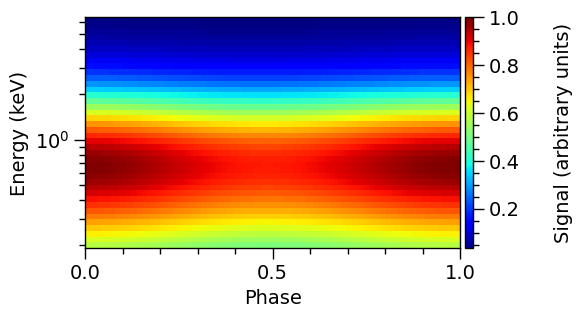

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 11 10:48:58 2023

@author: bas, much copied from postprocessing tutorial
"""

# Importing relevant modules

# %matplotlib inline

# from __future__ import division

import sys
import os
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, AutoLocator, AutoMinorLocator
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import math

from collections import OrderedDict

import xpsi

from xpsi import PostProcessing

# choose a seed for the notebook if you want caching to be useful
# and the notebook exactly reproducible
PostProcessing.set_random_seed(42)

from xpsi.global_imports import gravradius


sys.path.append("../")
sys.path.append("../../")

from helper_functions import get_keV_from_log10_Kelvin, get_T_in_log10_Kelvin


scenario = 'large_r'
bkg = 'model'
support_factor = 'None'

from analysis import analysis
ST = analysis('local','test',bkg, support_factor=support_factor, scenario=scenario)
ST()

from parameter_values import parameter_values
pv = parameter_values(scenario, bkg)
truths = pv.truths()
names = pv.names()
bounds = pv.bounds()
labels = pv.labels()

getdist_kde_settings = {'ignore_rows': 0,
                        'min_weight_ratio': 1.0e-10,
                        'contours': [0.683, 0.954, 0.997],
                        'credible_interval_threshold': 0.001,
                        'range_ND_contour': 0,
                        'range_confidence': 0.001,
                        'fine_bins': 1024,
                        'smooth_scale_1D': 0.4,
                        'num_bins': 100,
                        'boundary_correction_order': 1,
                        'mult_bias_correction_order': 1,
                        'smooth_scale_2D': 0.4,
                        'max_corr_2D': 0.99,
                        'fine_bins_2D': 512,
                        'num_bins_2D': 40}





In [2]:
base_dir='/home/bas/Documents/Projects/x-psi/xpsi-bas-fork/AMXPs/J1808_synthetic/snellius_runs'

In [3]:
roots = []
job_ids = []
job_labels = []
run_ids = []

# negative background allowed, no support
# job_ids.append('5204648')
# job_labels.append('neg_bkg_lp192')

# fixed background
# job_ids.append('5133792')
# job_labels.append('given_bg_lp192')
# run_ids.append('fix bkg')

# no support
# job_ids.append('4960988')
# job_labels.append('no_poisson_lp192')
# run_ids.append('no support')

# sf = 1.5, seed = 7
# job_ids.append('5210494')
# job_labels.append('sf_15_lp192')
# run_ids.append('+- 50%')

# sf = 1.1, seed = 7 
# job_ids.append('4977822') #this one is an outlier for some reason
# job_labels.append('np_sfac_1.1_lp192')
# run_ids.append('sf_11_se_7')

# job_ids.append('5216186')
# job_labels.append('sf_11_se_7_lp192')
# run_ids.append('+- 10%')

# sf = 1.1, multinest seed = 0
# job_ids.append('5210560')
# job_labels.append('sf_11_se_0_lp192')
# run_ids.append('sf_11_se_0')

# sf = 1.1, seed = 1
# job_ids.append('5210597')
# job_labels.append('sf_11_se_1_lp192')
# run_ids.append('sf_11_se_1')

# sf = 1.1, seed = 7, lp = 1000
# job_ids.append('5210748')
# job_labels.append('sf_11_lp1000')

# sf = 1.1, seed = 7, poisson noise
# job_ids.append('5215731')
# job_labels.append('sf_11_pn_lp192')

# sf = 1.001
# job_ids.append('5134108')
# job_labels.append('sf_1001_lp192')
# run_ids.append('old')

# sf = 1.001 (2) 
# job_ids.append('5217380')
# job_labels.append('sf_1001_lp192')
# run_ids.append('new')

# sf = 1.001 negative background allowed, 
# job_ids.append('5206416')
# job_labels.append('nb_sf_1001_lp192')

# sf = 1.00005
# job_ids.append('5196881')
# job_labels.append('sf_100005_lp192')

# bkg_derived_lp192  
# job_ids.append('5316365')
# job_labels.append('bkg_derived_lp192')
# run_ids.append('bkg_wide_lp192')

# bkg_tight_lp192
# job_ids.append('5325163')
# job_labels.append('bkg_tight_lp192')
# run_ids.append('bkg_tight_lp192')

# realdata_lp192
# job_ids.append('5385333')
# job_labels.append('realdata_lp192')
# run_ids.append('realdata')

# realdata_lp1000
# job_ids.append('5390610')
# job_labels.append('realdata_lp1000')
# run_ids.append('lp1000')

# realdata_lp1000_multi
# job_ids.append('5413794')
# job_labels.append('realmulti_lp1000')
# run_ids.append('lp1000_multi')

# reallowdlim_lp192
# job_ids.append('5413815')
# job_labels.append('reallowdlim_lp192')
# run_ids.append('reallowdlim_lp192')


# realdata_2022
# job_ids.append('5415651')
# job_labels.append('2022lowd_lp192')
# run_ids.append('2022 lowd')

# job_ids.append('5415668')
# job_labels.append('2022highd_lp192')
# run_ids.append('2022 highd')


#new distance
# job_ids.append('5442357')
# job_labels.append('2019newd_lp1000')
# run_ids.append('2019 newd')

# job_ids.append('5442163')
# job_labels.append('2022newd_lp1000')
# run_ids.append('2022 newd')

# kajava 
# job_ids.append('5523257')
# job_labels.append('k_sf_none_lp192')
# run_ids.append('sf_none')

# job_ids.append('5523560')
# job_labels.append('k_sf_5e-1_lp192')
# run_ids.append('sf_5e-1')

# job_ids.append('5526787')
# job_labels.append('k_sf_1e-3_lp192')
# run_ids.append('sf_1e-3')

#distance tests
# job_ids.append('5569840')
# job_labels.append('sf_5e-1_distance_uniform_lp192')
# run_ids.append('distance_uniform_3.4-3.6')

# job_ids.append('5569859')
# job_labels.append('sf_5e-1_distance_gaussian_lp192')
# run_ids.append('distance_gauss_3.4_3.6')

# job_ids.append('5569975')
# job_labels.append('sf_5e-1_distance_gaussian_lp192')
# run_ids.append('distance_gauss_3.2_3.8')

# job_ids.append('5569914')
# job_labels.append('sf_5e-1_distance_gaussian_lp192')
# run_ids.append('distance_gauss_2.0_5.0')

# test remove interstellar from customsignal. does it remove distance bias?
# job_ids.append('5580325')
# job_labels.append('bkg_rmv_interstellar_lp192') # typo, should have been 5e-1
# run_ids.append('bkg no interstellar')

# comparing poisson noises
# job_ids.append('5591138')
# job_labels.append('sf_5e-1_uintdata_lp192') 
# run_ids.append('pn seed=42')

# job_ids.append('5617570')
# job_labels.append('sf_5e-1_pn_s0_lp192') 
# run_ids.append('pn seed=0')

# job_ids.append('5617595')
# job_labels.append('sf_5e-1_pn_s1_lp192') 
# run_ids.append('pn seed=1')

#different constraints, fixed, marginalised, but with poisson noise
# job_ids.append('5617909')
# job_labels.append('fix_pn_s42_lp192') 
# run_ids.append('bkg fix 192 lp')

# job_ids.append('5617841')
# job_labels.append('sf_9e-1_pn_s42_lp192') 
# run_ids.append('+-90% bkg constr, data < 3 keV')

# job_ids.append('5617759')
# job_labels.append('sf_none_pn_s42_lp192') 
# run_ids.append('no bkg constr, data < 3 keV')

#wider energy range
# job_ids.append('5652180')
# job_labels.append('sf_none_pn_wider_energy_lp192') 
# run_ids.append('sf_None_lp192')

# job_ids.append('5652397')
# job_labels.append('sf_9e-1_pn_wider_energy_lp192') 
# run_ids.append('sf_9e-1_lp192')

# 1000 lp
# job_ids.append('5773131')
# job_labels.append('bkg_fix_pn_lp1000') 
# run_ids.append('bkg fix 1000 lp')

# job_ids.append('5766837')
# job_labels.append('sf_None_pn_lp1000') 
# run_ids.append('sf_None_lp1000')

# job_ids.append('5773522')
# job_labels.append('bkg_model_tight_pn_lp1000') 
# run_ids.append('tight disk prior')

# job_ids.append('5794153')
# job_labels.append('bkg_model_wide_pn_lp1000') 
# run_ids.append('wide disk prior')


job_ids.append('6136704')
job_labels.append('large_r_lp1000') 
run_ids.append('large_r')



# job_ids.append('5789162')
# job_labels.append('sf_9e-1_pn_lp1000') 
# run_ids.append('sf_9e-1_lp1000')



# 2000 lp
# job_ids.append('5794594')
# job_labels.append('bkg_fix_pn_lp2000') 
# run_ids.append('fixed disk')

base_dirs = []
for job_id, job_label, index in zip(job_ids, job_labels, range(len(job_ids))):
    base_dirs.append(f'{base_dir}/{job_label}/{job_id}/{job_label}')
    roots.append('run_ST_')

In [4]:
ST.runs = xpsi.Runs.load_runs(ID='ST',
                               run_IDs=run_ids,
                               roots=roots,
                               base_dirs=base_dirs,
                               use_nestcheck=[False]*len(job_ids),
                               kde_settings=getdist_kde_settings,
                               likelihood=ST.likelihood,
                               names=names,
                               bounds=bounds,
                               labels=labels,
                               truths=truths,
                               implementation='multinest',
                               overwrite_transformed=True)

In [14]:
def cornerplot(parameters, my_bounds = {}):
    pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
    fig = pp.plot(
         params=parameters,
         IDs=OrderedDict([('ST', run_ids),]),
         prior_density=True,
         KL_divergence=True,
         ndraws=5e4,
         combine=True, combine_all=True, only_combined=False, overwrite_combined=True,
         param_plot_lims=my_bounds, #{},
         bootstrap_estimators=False,
         bootstrap_density=False,
         n_simulate=200,
         crosshairs=True,
         ext='.png',
         maxdots=3000,
         root_filename=f'run',
         credible_interval_1d=True,
         credible_interval_1d_all_show=True, # To show credible intervals for all runs/models, hides KL divergence
         show_vband=[0,1],                   # To list which vertical colored bands are shown in 1D-posteriors
                                             #  0 for run_seed0,  1 for run_seed42
         annotate_credible_interval=True,
         compute_all_intervals=False,
         sixtyeight=True,
         axis_tick_x_rotation=45.0,
         num_plot_contours=3,
         subplot_size=4.0,
         legend_corner_coords=(0.675,0.8),
         legend_frameon=False,
         scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                                  ('axes_labelsize', 2.0),
                                  ('axes_fontsize', 'axes_labelsize'),
                                 ]
                                ),
         colormap='Reds',
         shaded=True,
         shade_root_index=-1,
         rasterized_shade=True,
         no_ylabel=True,
         no_ytick=True,
         lw=1.0,
         lw_1d=1.0,
         filled=False,
         normalize=False,
         veneer=True,
         #contour_colors=['orange'],
         tqdm_kwargs={'disable': False},
         lengthen=2.0,
         embolden=1.0,
         nx=500,
         write=False,
         force_draw=[True])#,
         #prior_samples_fnames = ['prior_samples.npy'])

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'compactness']
Adding 1D marginal prior density functions...
Plotting prior for posterior ST...
Drawing samples from the joint prior...
Samples drawn.
Added 1D marginal prior density functions.
Veneering spines and axis ticks...
Veneered.
Adding parameter truth crosshairs...
Added crosshairs.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


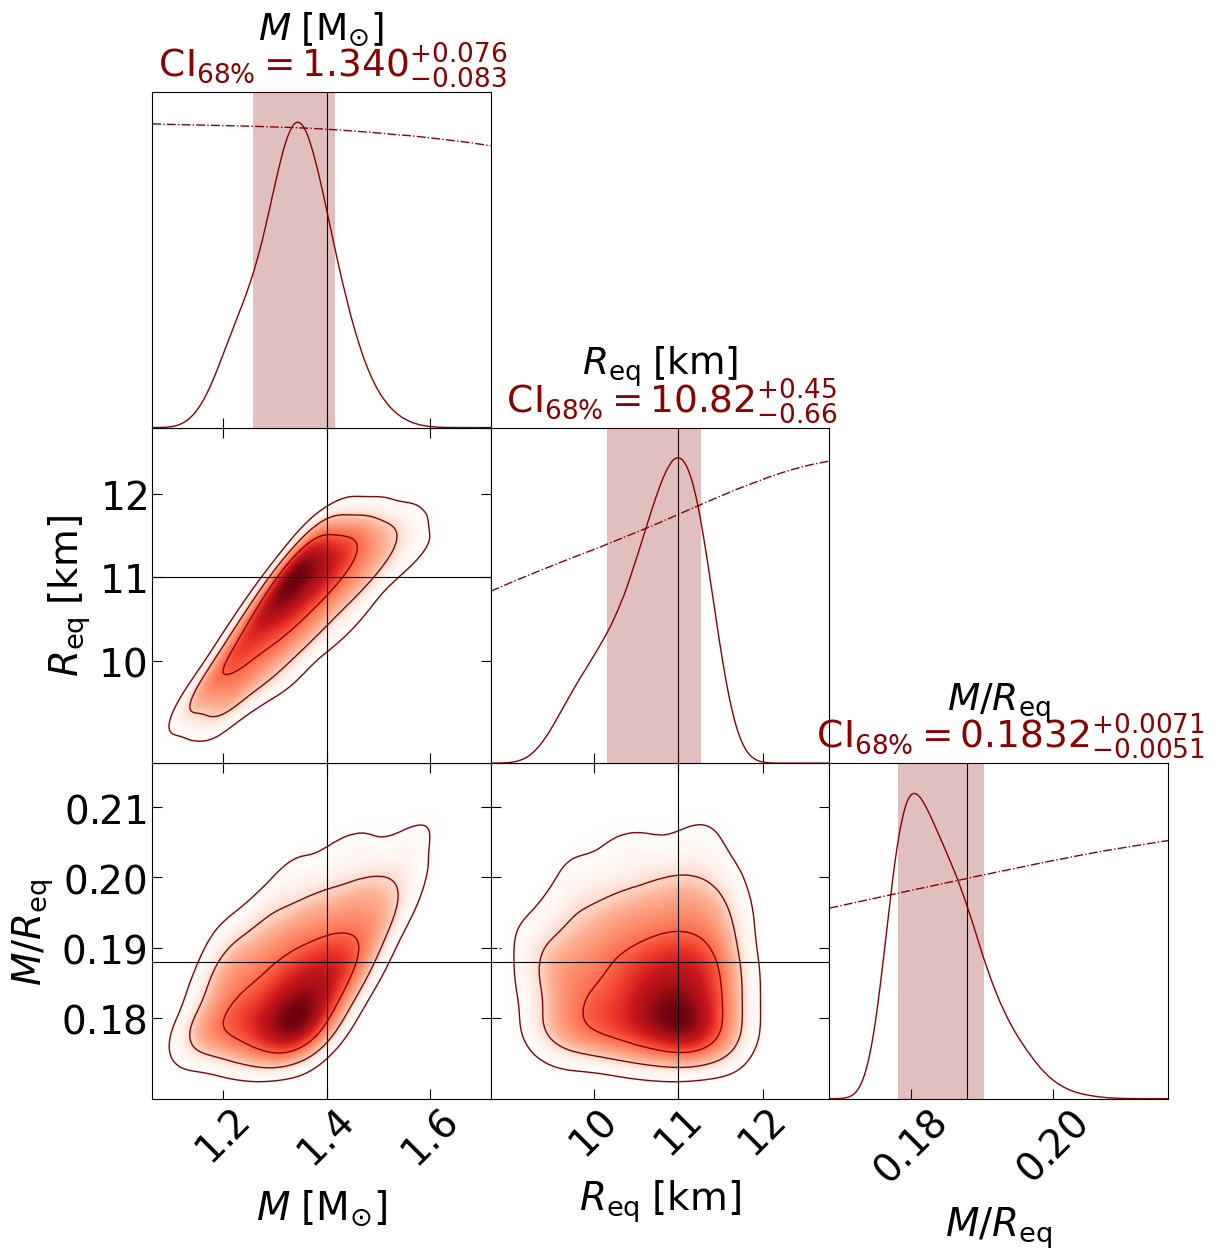

In [15]:
mass_radius = ["mass", "radius", "compactness"]

bounds_mass_radius = {}
# for name in mass_radius:
#     bounds_mass_radius[name] = bounds[name]

cornerplot(mass_radius, bounds_mass_radius)

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'distance']
plotting:  ['mass', 'column_density']
plotting:  ['mass', 'inclination_deg']
plotting:  ['mass', 'phase_shift']
plotting:  ['mass', 'colatitude_deg']
plotting:  ['mass', 'radius_deg']
plotting:  ['mass', 'super_tau']
plotting:  ['mass', 'tbb_keV']
plotting:  ['mass', 'te_keV']
plotting:  ['mass', 'R_in']
plotting:  ['mass', 'T_in_keV']
plotting:  ['radius', 'distance']
plotting:  ['radius', 'column_density']
plotting:  ['radius', 'inclination_deg']
plotting:  ['radius', 'phase_shift']
plotting:  ['radius', 'colatitude_deg']
plotting:  ['radius', 'radius_deg']
plotting:  ['radius', 'super_tau']
plotting:  ['radius', 'tbb_keV']
plotting:  ['radius', 'te_keV']
plotting:  ['radius', 'R_in']
plotting:  ['radius', 'T_in_keV']
plotting:  ['distance', 'column_d

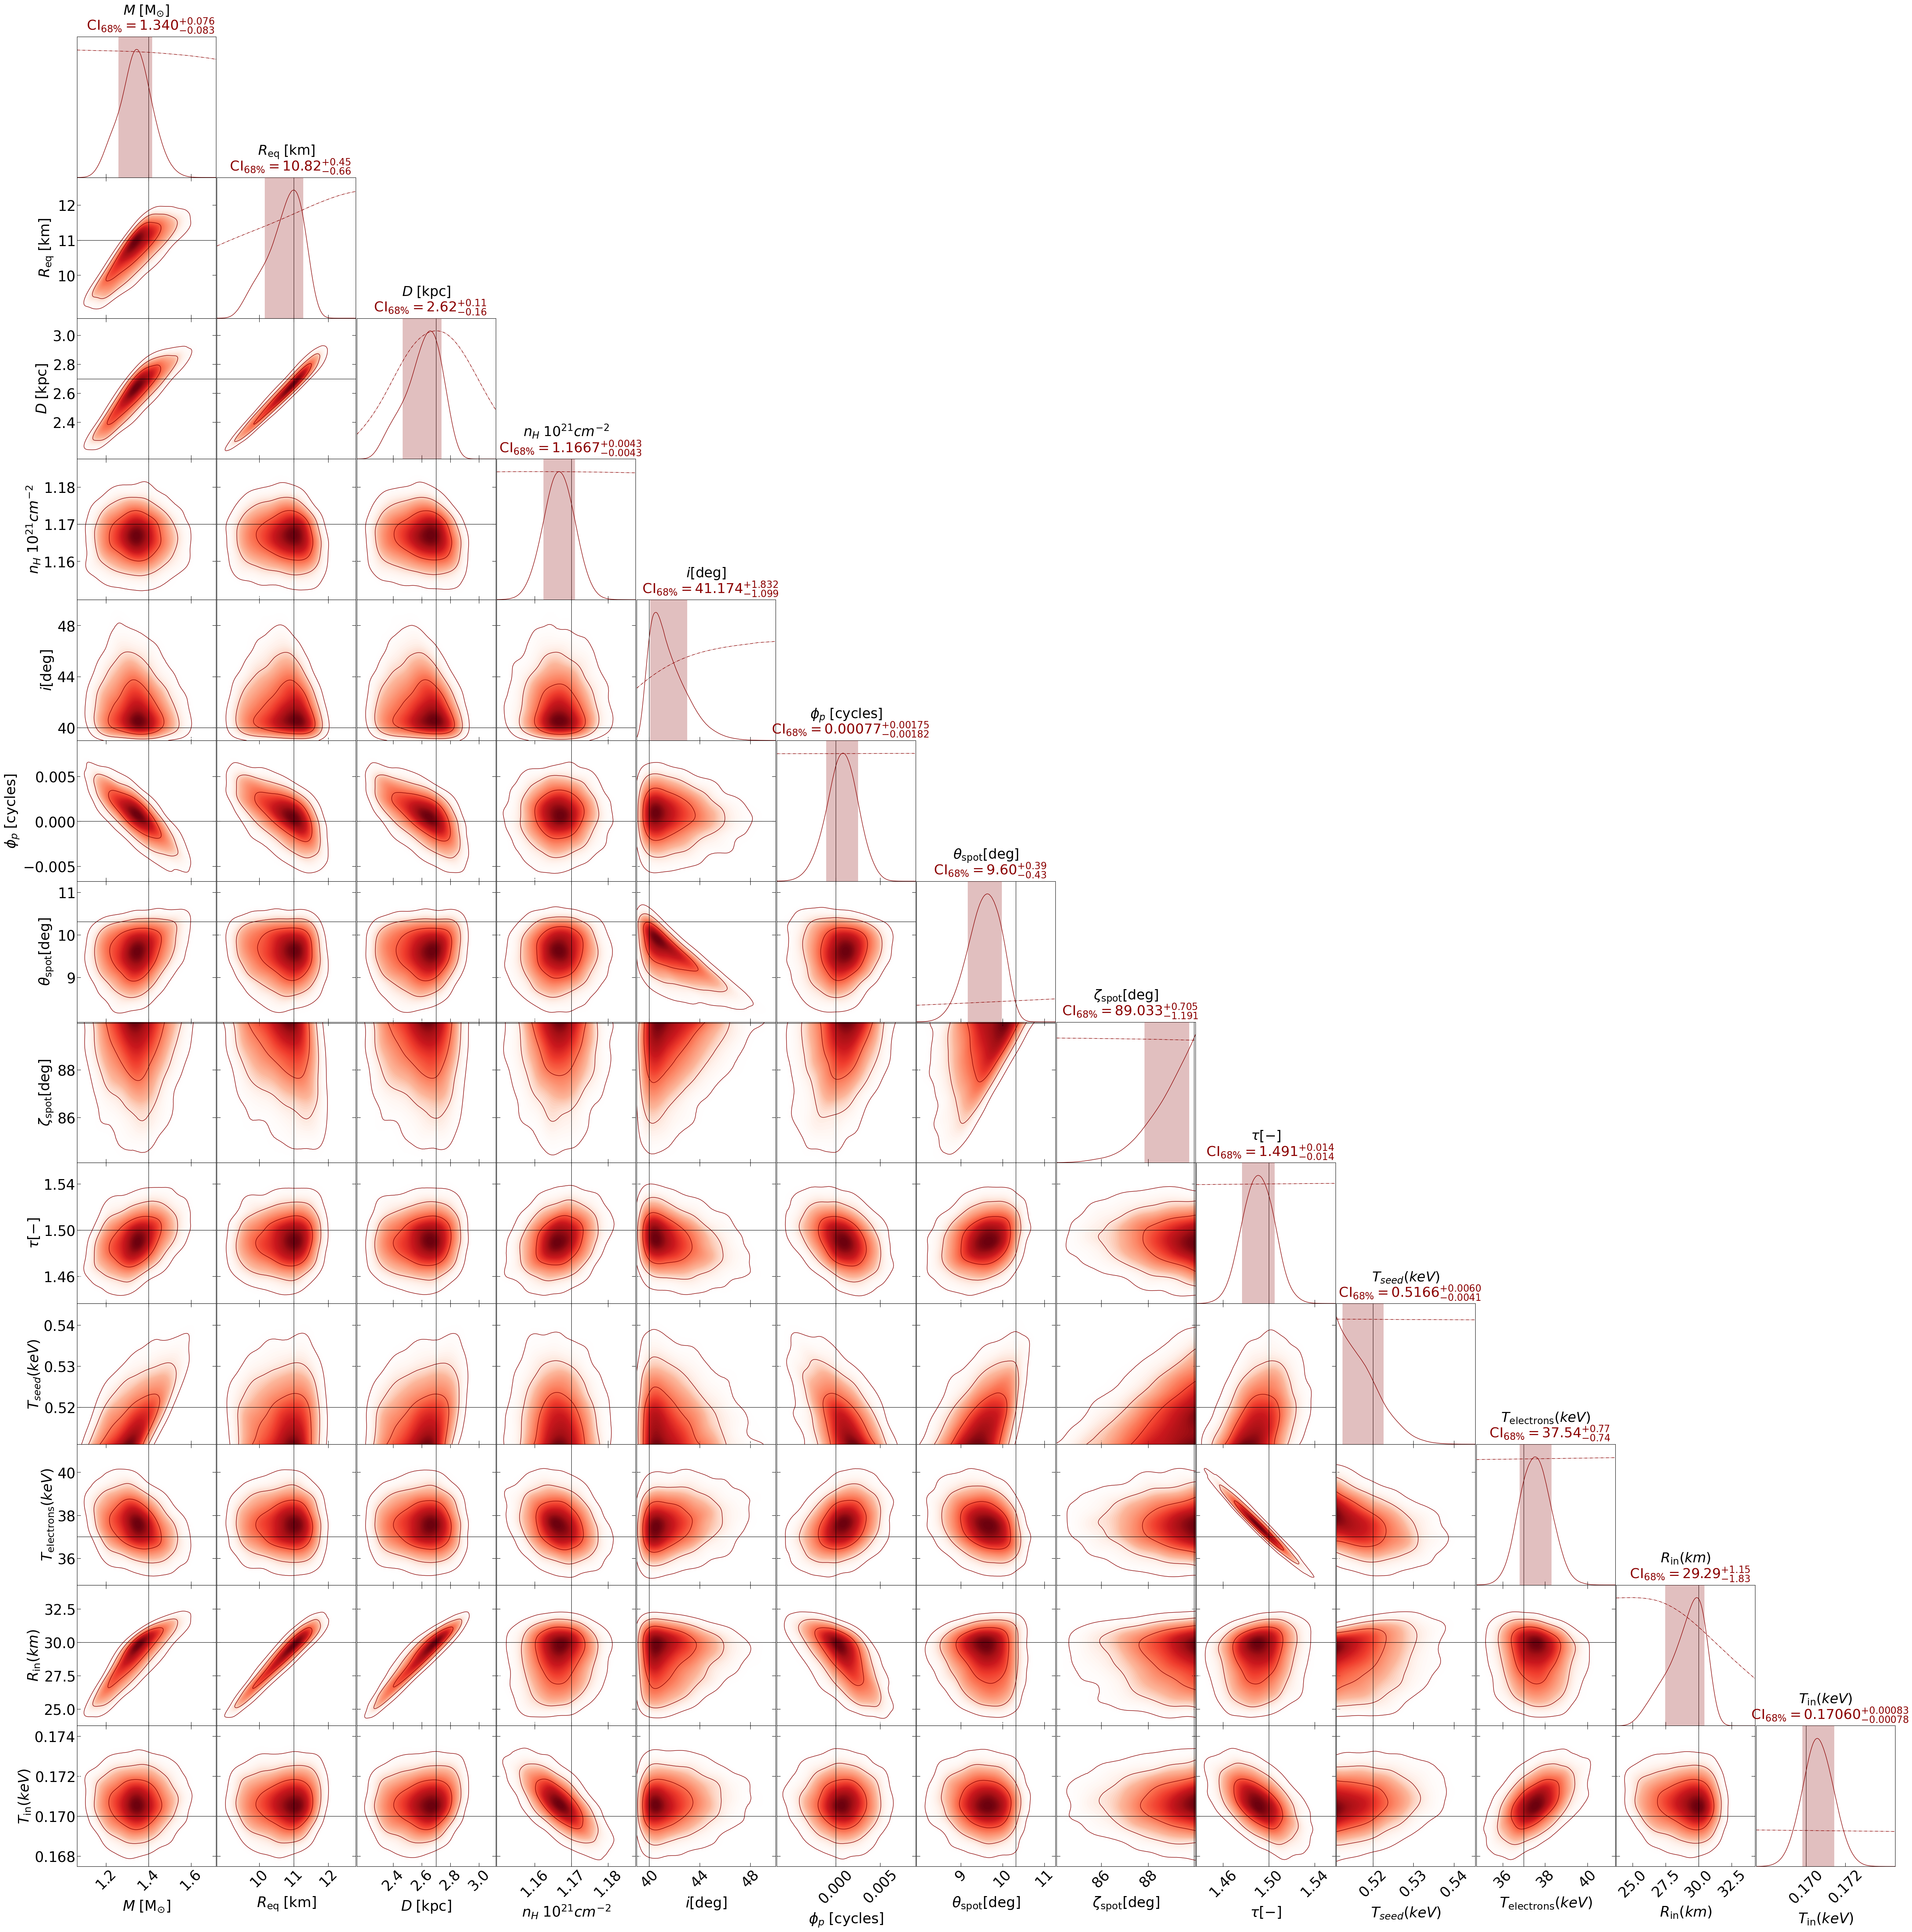

In [16]:
full_plot = ['mass','radius','distance', 'column_density', 'inclination_deg','phase_shift', 'colatitude_deg', 'radius_deg', 'super_tau', 'tbb_keV','te_keV', 'R_in', 'T_in_keV']

bounds_full_plot = {}
for name in full_plot:
    bounds_full_plot[name] = bounds[name]

#cornerplot(full_plot, bounds_full_plot)

cornerplot(full_plot)

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['distance', 'column_density']
Adding 1D marginal prior density functions...
Plotting prior for posterior ST...
Drawing samples from the joint prior...
Samples drawn.
Added 1D marginal prior density functions.
Veneering spines and axis ticks...
Veneered.
Adding parameter truth crosshairs...
Added crosshairs.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


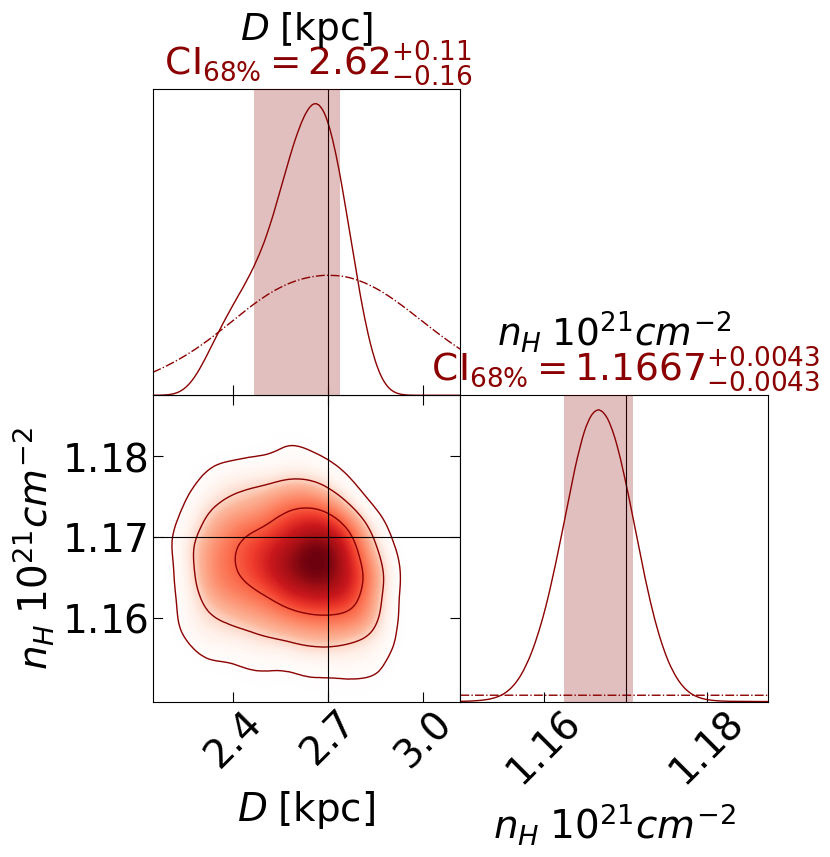

In [8]:
interstellar = ["distance", "column_density"]
cornerplot(interstellar)


In [9]:
# plt.hist(ST.runs._runs[0]._samples[:,-1])

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['cos_inclination', 'phase_shift']
plotting:  ['cos_inclination', 'super_colatitude']
plotting:  ['cos_inclination', 'super_radius']
plotting:  ['phase_shift', 'super_colatitude']
plotting:  ['phase_shift', 'super_radius']
plotting:  ['super_colatitude', 'super_radius']
Adding 1D marginal prior density functions...
Plotting prior for posterior ST...
Drawing samples from the joint prior...
Samples drawn.
Added 1D marginal prior density functions.
Veneering spines and axis ticks...
Veneered.
Adding parameter truth crosshairs...
Added crosshairs.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


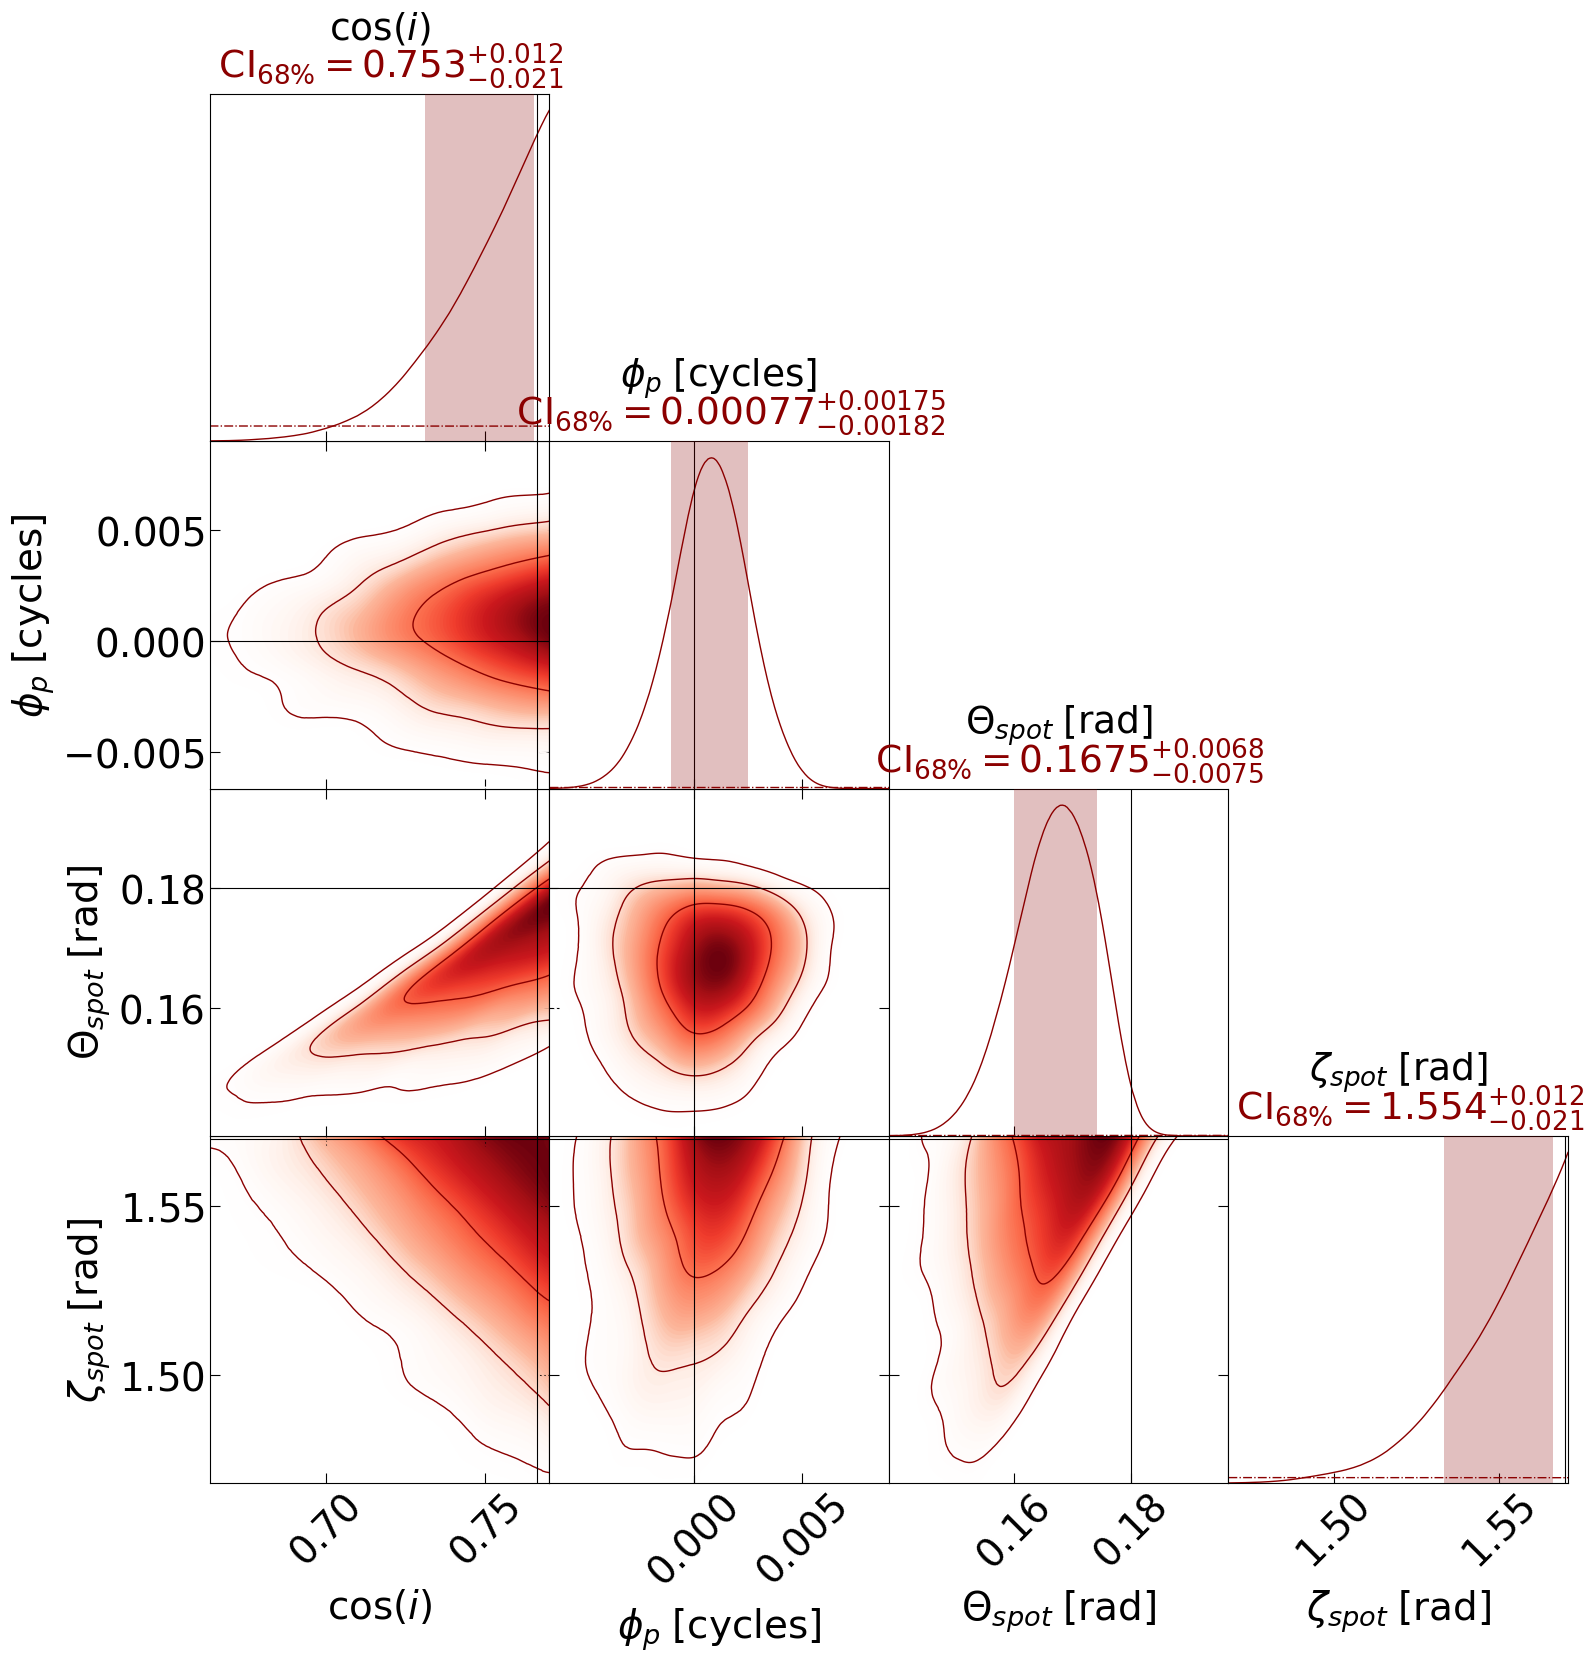

In [10]:
geometry = ['cos_inclination', 'phase_shift', 'super_colatitude', 'super_radius']

cornerplot(geometry)

In [11]:
truths

{'mass': 1.4,
 'radius': 11.0,
 'compactness': 0.18793410618181816,
 'distance': 2.7,
 'cos_inclination': 0.766044443118978,
 'phase_shift': 0,
 'super_colatitude': 0.18,
 'super_radius': 1.5697963267948967,
 'super_tbb': 0.0010176125244618396,
 'tbb_keV': 0.52,
 'super_te': 72.40704500978474,
 'te_keV': 37.0,
 'super_tau': 1.5,
 'column_density': 1.17,
 'inclination_deg': 40,
 'colatitude_deg': 10.313240312354818,
 'radius_deg': 89.94270422048692,
 'T_in': 6.29507617962808,
 'T_in_keV': 0.17,
 'R_in': 30}

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['tbb_keV', 'te_keV']
plotting:  ['tbb_keV', 'super_tau']
plotting:  ['te_keV', 'super_tau']
Adding 1D marginal prior density functions...
Plotting prior for posterior ST...
Drawing samples from the joint prior...
Samples drawn.
Added 1D marginal prior density functions.
Veneering spines and axis ticks...
Veneered.
Adding parameter truth crosshairs...
Added crosshairs.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


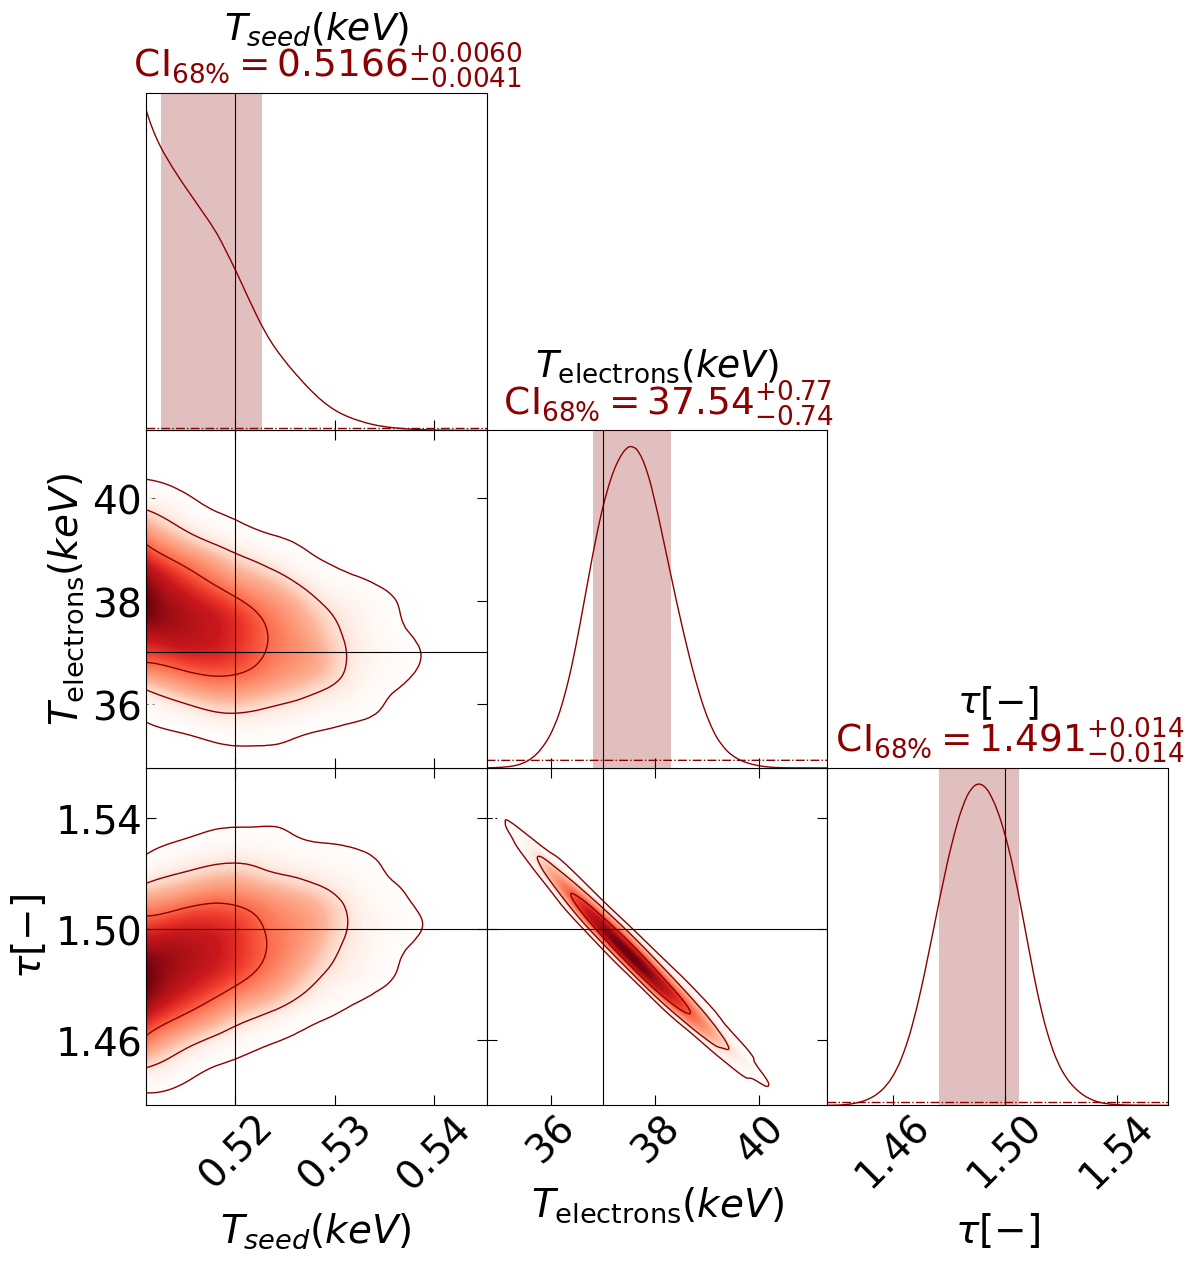

In [12]:
atmosphere =  ['tbb_keV', 'te_keV', 'super_tau'] # ['super_tbb', 'super_te', 'super_tau'] #
cornerplot(atmosphere)

In [13]:
if bkg == 'model':
    background = ['T_else_keV', 'T_in_keV', 'R_in']
if bkg =='marginalise' or bkg =='fix':
    background = ['T_else_keV']

cornerplot(background)

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.


ParameterError: No parameter name matching T_else_keV in run with ID ST.

In [ ]:
pp = xpsi.SignalPlotter([ST.runs])
pp.plot(IDs=OrderedDict([('ST', run_ids),
                        ]),
        combine=False, # use these controls if more than one run for a posterior
        combine_all=False,
        force_combine=False,
        only_combined=False,
        force_cache=True,
        nsamples=3,
        plots = {'ST': xpsi.ResidualPlot()})

pp.plots["ST"].fig


#%%

# plt.savefig(f'./corner_run_se={sampling_efficiency}_lp={live_points}_atm={atmosphere_type}{n_params}_ne={num_energies}_mi={max_iterations}.png')



pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
fig = pp.plot(
     params=["mass", "radius", "compactness"],
     IDs=OrderedDict([('ST', job_labels),]),
     prior_density=False,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=True,
     write=True,
     ext='.png',
     maxdots=3000,
     root_filename=f'run',
     credible_interval_1d=True,
     credible_interval_1d_all_show=True, # To show credible intervals for all runs/models
     show_vband=[0,1],                   # To list which vertical colored bands are shown in 1D-posteriors
                                         #  0 for run_seed0,  1 for run_seed42
     annotate_credible_interval=True,
     compute_all_intervals=False,
     sixtyeight=True,
     axis_tick_x_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('axes_labelsize', 1.35),
                              ('axes_fontsize', 'axes_labelsize'),
                             ]
                            ),
     colormap='Reds',
     shaded=True,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=1.0,
     lw_1d=1.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500)



In [ ]:
# pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
# fig = pp.plot(
#      params=ST.names,
#      IDs=OrderedDict([('ST', run_ids),]),
#      prior_density=False,
#      KL_divergence=True,
#      ndraws=5e4,
#      combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
#      param_plot_lims={},
#      bootstrap_estimators=False,
#      bootstrap_density=False,
#      n_simulate=200,
#      crosshairs=True,
#      write=True,
#      ext='.png',
#      maxdots=3000,
#      root_filename=f'run',
#      credible_interval_1d=True,
#      credible_interval_1d_all_show=True, # To show credible intervals for all runs/models
#      show_vband=[0,1],                   # To list which vertical colored bands are shown in 1D-posteriors
#                                          #  0 for run_seed0,  1 for run_seed42
#      annotate_credible_interval=True,
#      compute_all_intervals=False,
#      sixtyeight=True,
#      axis_tick_x_rotation=45.0,
#      num_plot_contours=3,
#      subplot_size=4.0,
#      legend_corner_coords=(0.675,0.8),
#      legend_frameon=False,
#      scale_attrs=OrderedDict([('legend_fontsize', 2.0),
#                               ('axes_labelsize', 1.35),
#                               ('axes_fontsize', 'axes_labelsize'),
#                              ]
#                             ),
#      colormap='Reds',
#      shaded=True,
#      shade_root_index=-1,
#      rasterized_shade=True,
#      no_ylabel=True,
#      no_ytick=True,
#      lw=1.0,
#      lw_1d=1.0,
#      filled=False,
#      normalize=True,
#      veneer=True,
#      #contour_colors=['orange'],
#      tqdm_kwargs={'disable': False},
#      lengthen=2.0,
#      embolden=1.0,
#      nx=500)

![Kajava spectra](kajavaspectra.png)

In [ ]:
# # checking if the backgrounds are close to the true background, as I had intended to do with the sf=1e-3 run
# p_maxl = [0.159453062566177328E+01, 
#           0.104589643155779335E+02, 
#           0.355799081205166212E+01, 
#           0.330597355227586487E+00, 
#           0.207947642719953973E+00,
#           0.171332491837719258E+00,
#           0.175973934142429345E+00,
#           0.186454798788438306E-02,
#           0.197617176695489405E+03,
#           0.872444286178499784E+00,
#           0.679089797332088629E+01,
#           0.112671121569684662E+01]

# ST.likelihood(p_maxl, reinitialise=True)
# plt.plot(ST.signal.background_signal)
# bg_spectrum = np.loadtxt(ST.file_bkg)
# plt.plot(bg_spectrum*ST.data.exposure_time)

In [ ]:
ST.instrument.channels.shape